---

## **<font color="#b08acd"> Modelación Climática Tropical</font>**
### **<font color="mediumpurple"> Mapas de climatologías para la precipitación en JJAS</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netCDF4 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5py netCDF4 h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from matplotlib.patches import Rectangle

In [8]:
def mapa_MC(data, levels, ccmap, titulo, extend='max', cbarlabel='pr [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 11))
    ax = plt.axes(projection=ccrs.PlateCarree())
    # agregamos lineas costeras
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    # Definimos la extensión del mapa
    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    # lineas divisoras de estados
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.55)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 15}
    gl.ylabel_style = {'size': 15}
    plt.title(titulo, fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)
    cbar.ax.xaxis.label.set_size(5)

In [9]:
# Definimos la nueva función para la barra de color 
def add_map_colorbar(pos, axis, labelsita, fig, cs):
    cbar_ax = fig.add_axes(axis)  # Definir el árear
    cbar = fig.colorbar(cs, cax=cbar_ax, orientation=pos, fraction=0.018, pad=0.05,aspect=65)
    cbar.ax.tick_params(labelsize=15)
    if labelsita is not None:
        cbar.set_label(label=labelsita, fontsize=15)
    return cbar

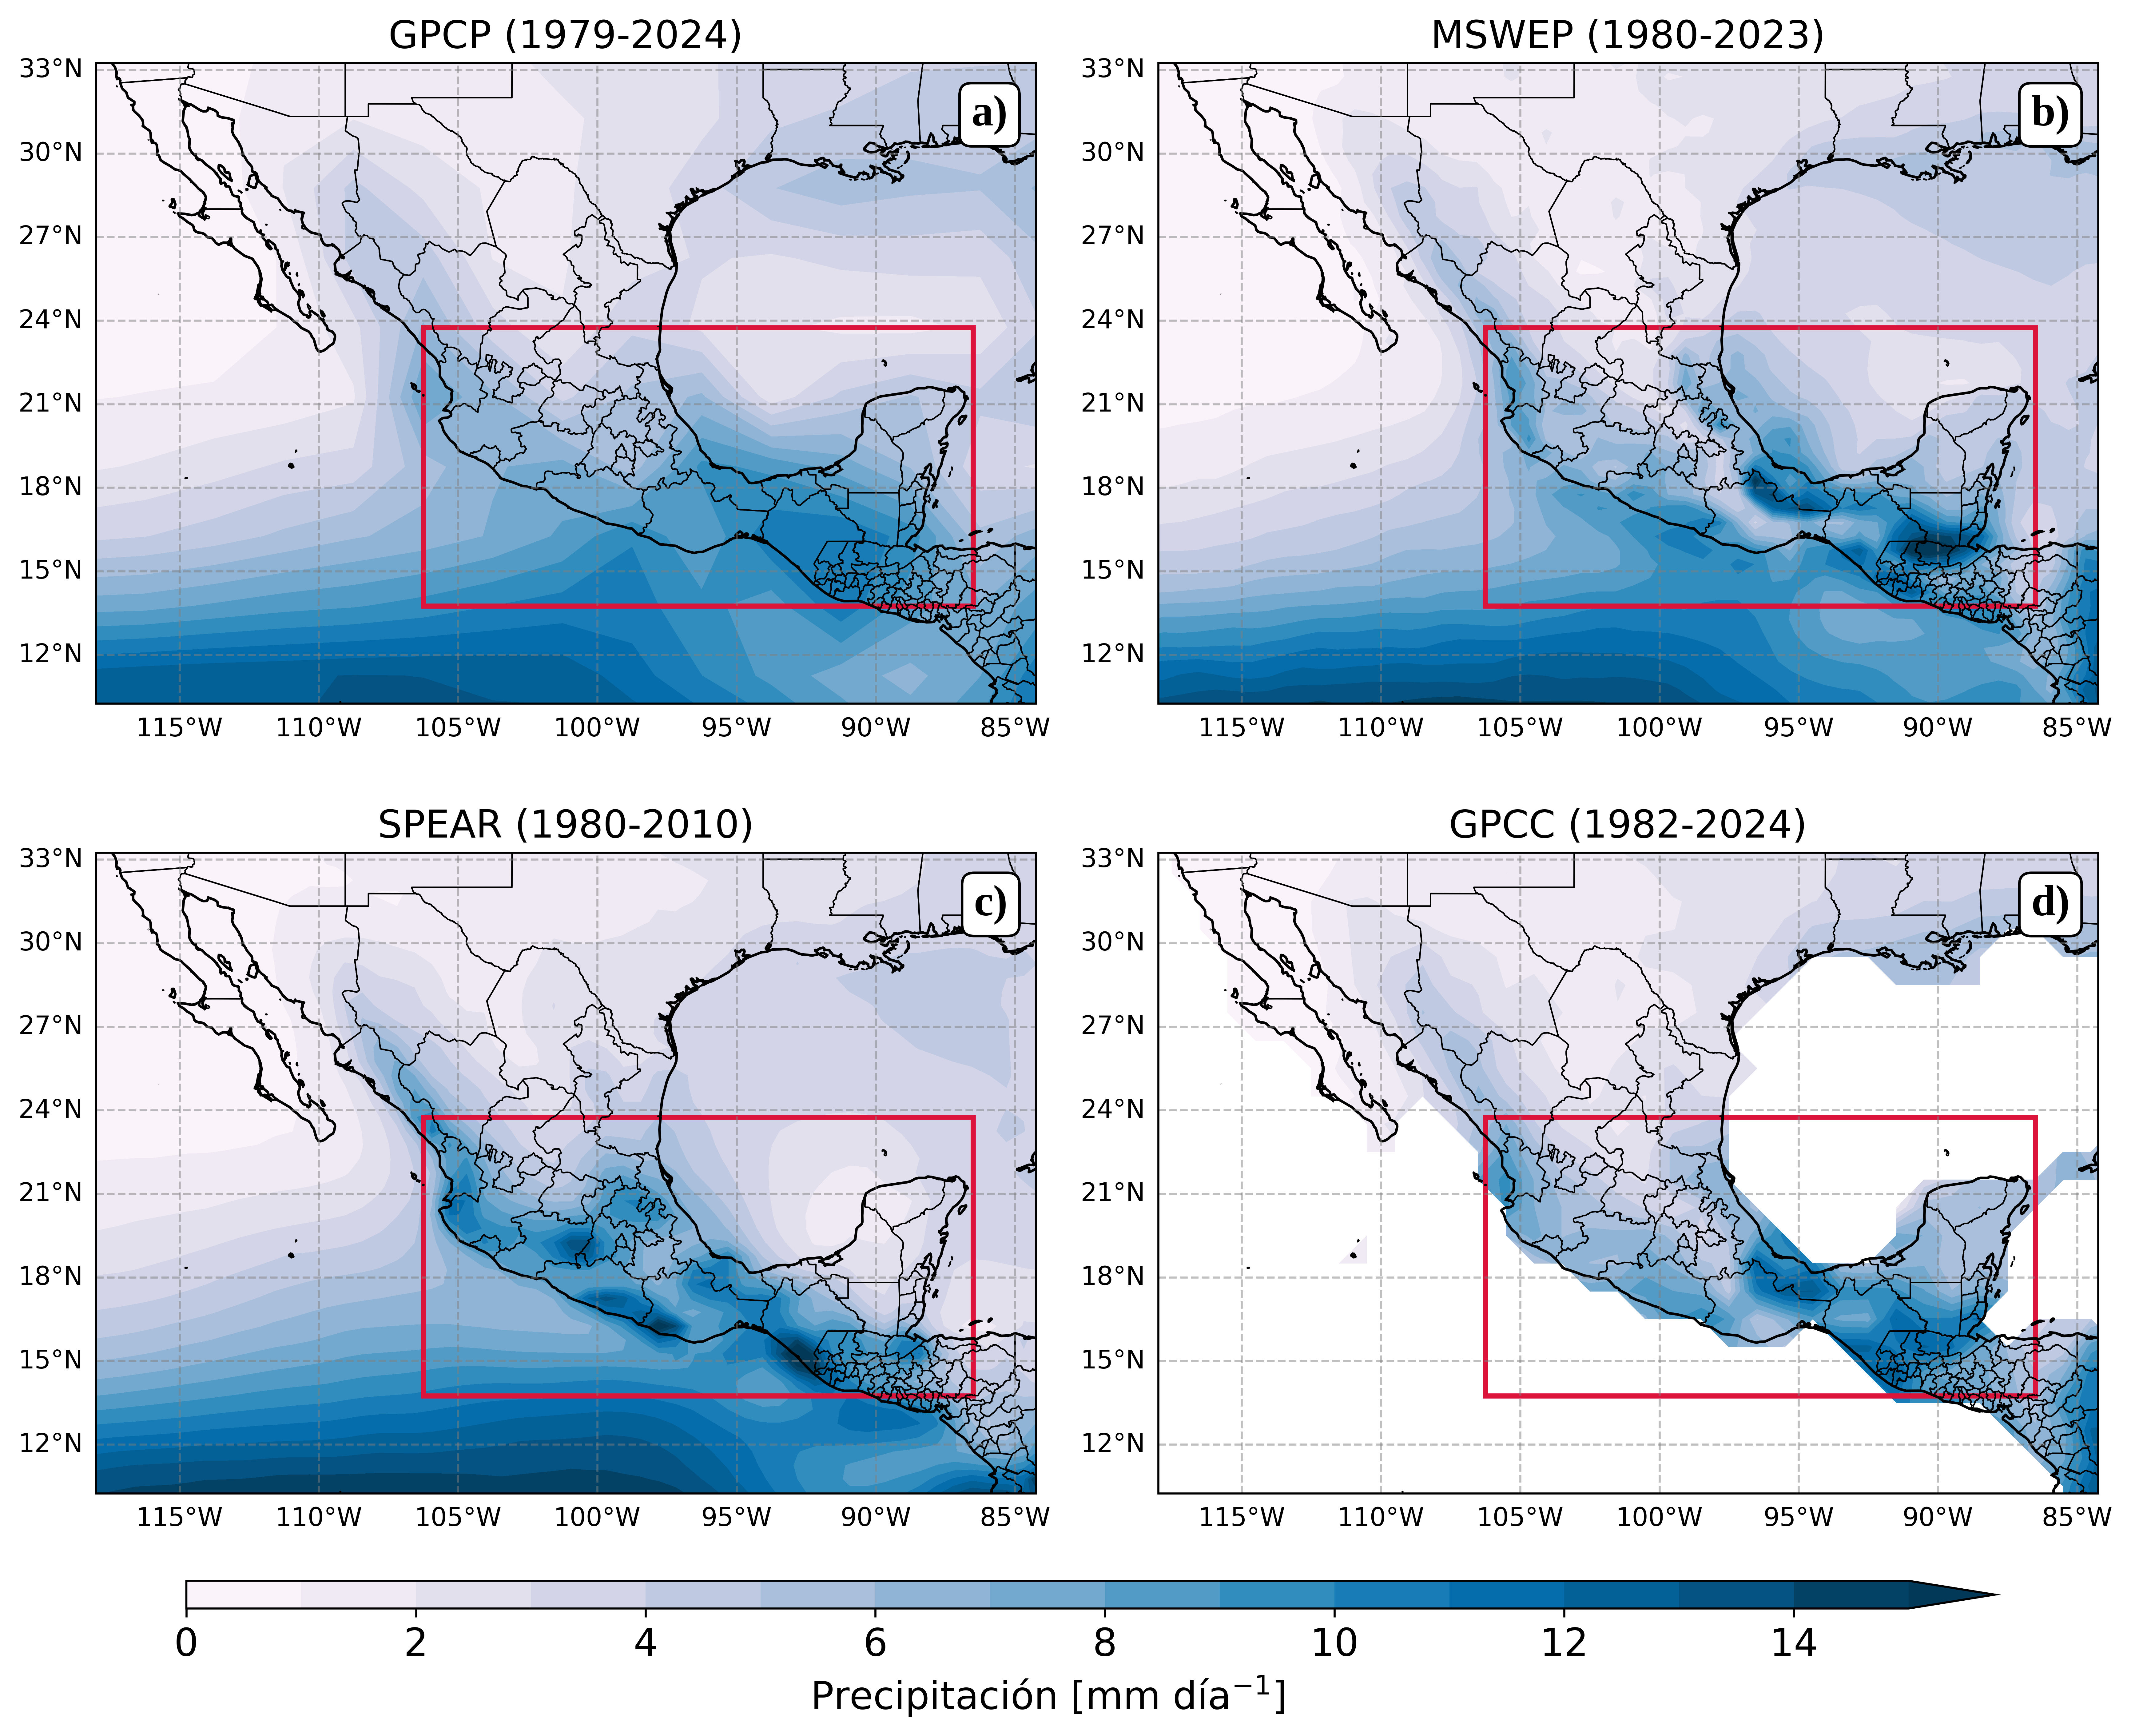

In [10]:
# Hacemos un diccionario con el nombre de la variable de precipitación
var_names = {'GPCP_ClimJJAS_actualizado.nc': 'precip', 'MSWEP_ClimJJAS_actualizado.nc': 'precipitation', 
             'SPEAR_ens80_ClimJJAS.nc': 'precip', 'GPCC_actualizado_ClimJJAS.nc': 'precip'}

# Archivos netcdf de los 4 datasets
files_precip = ['GPCP_ClimJJAS_actualizado.nc', 'MSWEP_ClimJJAS_actualizado.nc', 'SPEAR_ens80_ClimJJAS.nc', 'GPCC_actualizado_ClimJJAS.nc']

# Titulos 
titulos = ['GPCP (1979-2024)', 'MSWEP (1980-2023)', 'SPEAR (1980-2010)', 'GPCC (1982-2024)']

panel_labels = ['a)', 'b)', 'c)', 'd)']

levels_globo = np.arange(0, 16, 1)  

# Creando la figura para los subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.ravel()

# Ciclo para recorrer archivos y graficar en subplots
for i, (file_precip, titulo) in enumerate(zip(files_precip, titulos)):
    
    # Cargamos los datos
    ds_precip = xr.open_dataset(file_precip)
    var_name = var_names[file_precip]
    precip_climatologia = ds_precip[var_name]

    ax = axs[i]
    ax.coastlines()

    # Se graficará usando levels_globo
    cs = ax.contourf(precip_climatologia.lon, precip_climatologia.lat, precip_climatologia, 
                     levels=levels_globo, cmap='PuBu', extend='max', transform=ccrs.PlateCarree())
    ax.set_extent([242, 275.75, 10.25, 33.25], crs=ccrs.PlateCarree())
    
    # Líneas de estados
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.55)
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False

    # Títulos 
    ax.set_title(titulo, fontsize=15)

    ax.text(0.97, 0.95, panel_labels[i], transform=ax.transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))

    # Pondremos las coordenadas del recuadro de la zona de estudio para cada archivo
    lat_min, lat_max = 13.75, 23.75
    lon_min, lon_max = 253.75, 273.5
    
    # Dibujamos el recuadro 
    rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                     linewidth=2, edgecolor='crimson', facecolor='none', linestyle='solid', transform=ccrs.PlateCarree())
    ax.add_patch(rect)

# Colorbar única para todos los mapas
add_map_colorbar('horizontal', [0.16, 0.07, 0.7, 0.015], 'Precipitación [mm día$^{-1}$]', fig, cs)
fig.subplots_adjust(hspace=0.15, wspace=0.13, bottom=0.12, top=0.92)

plt.show()

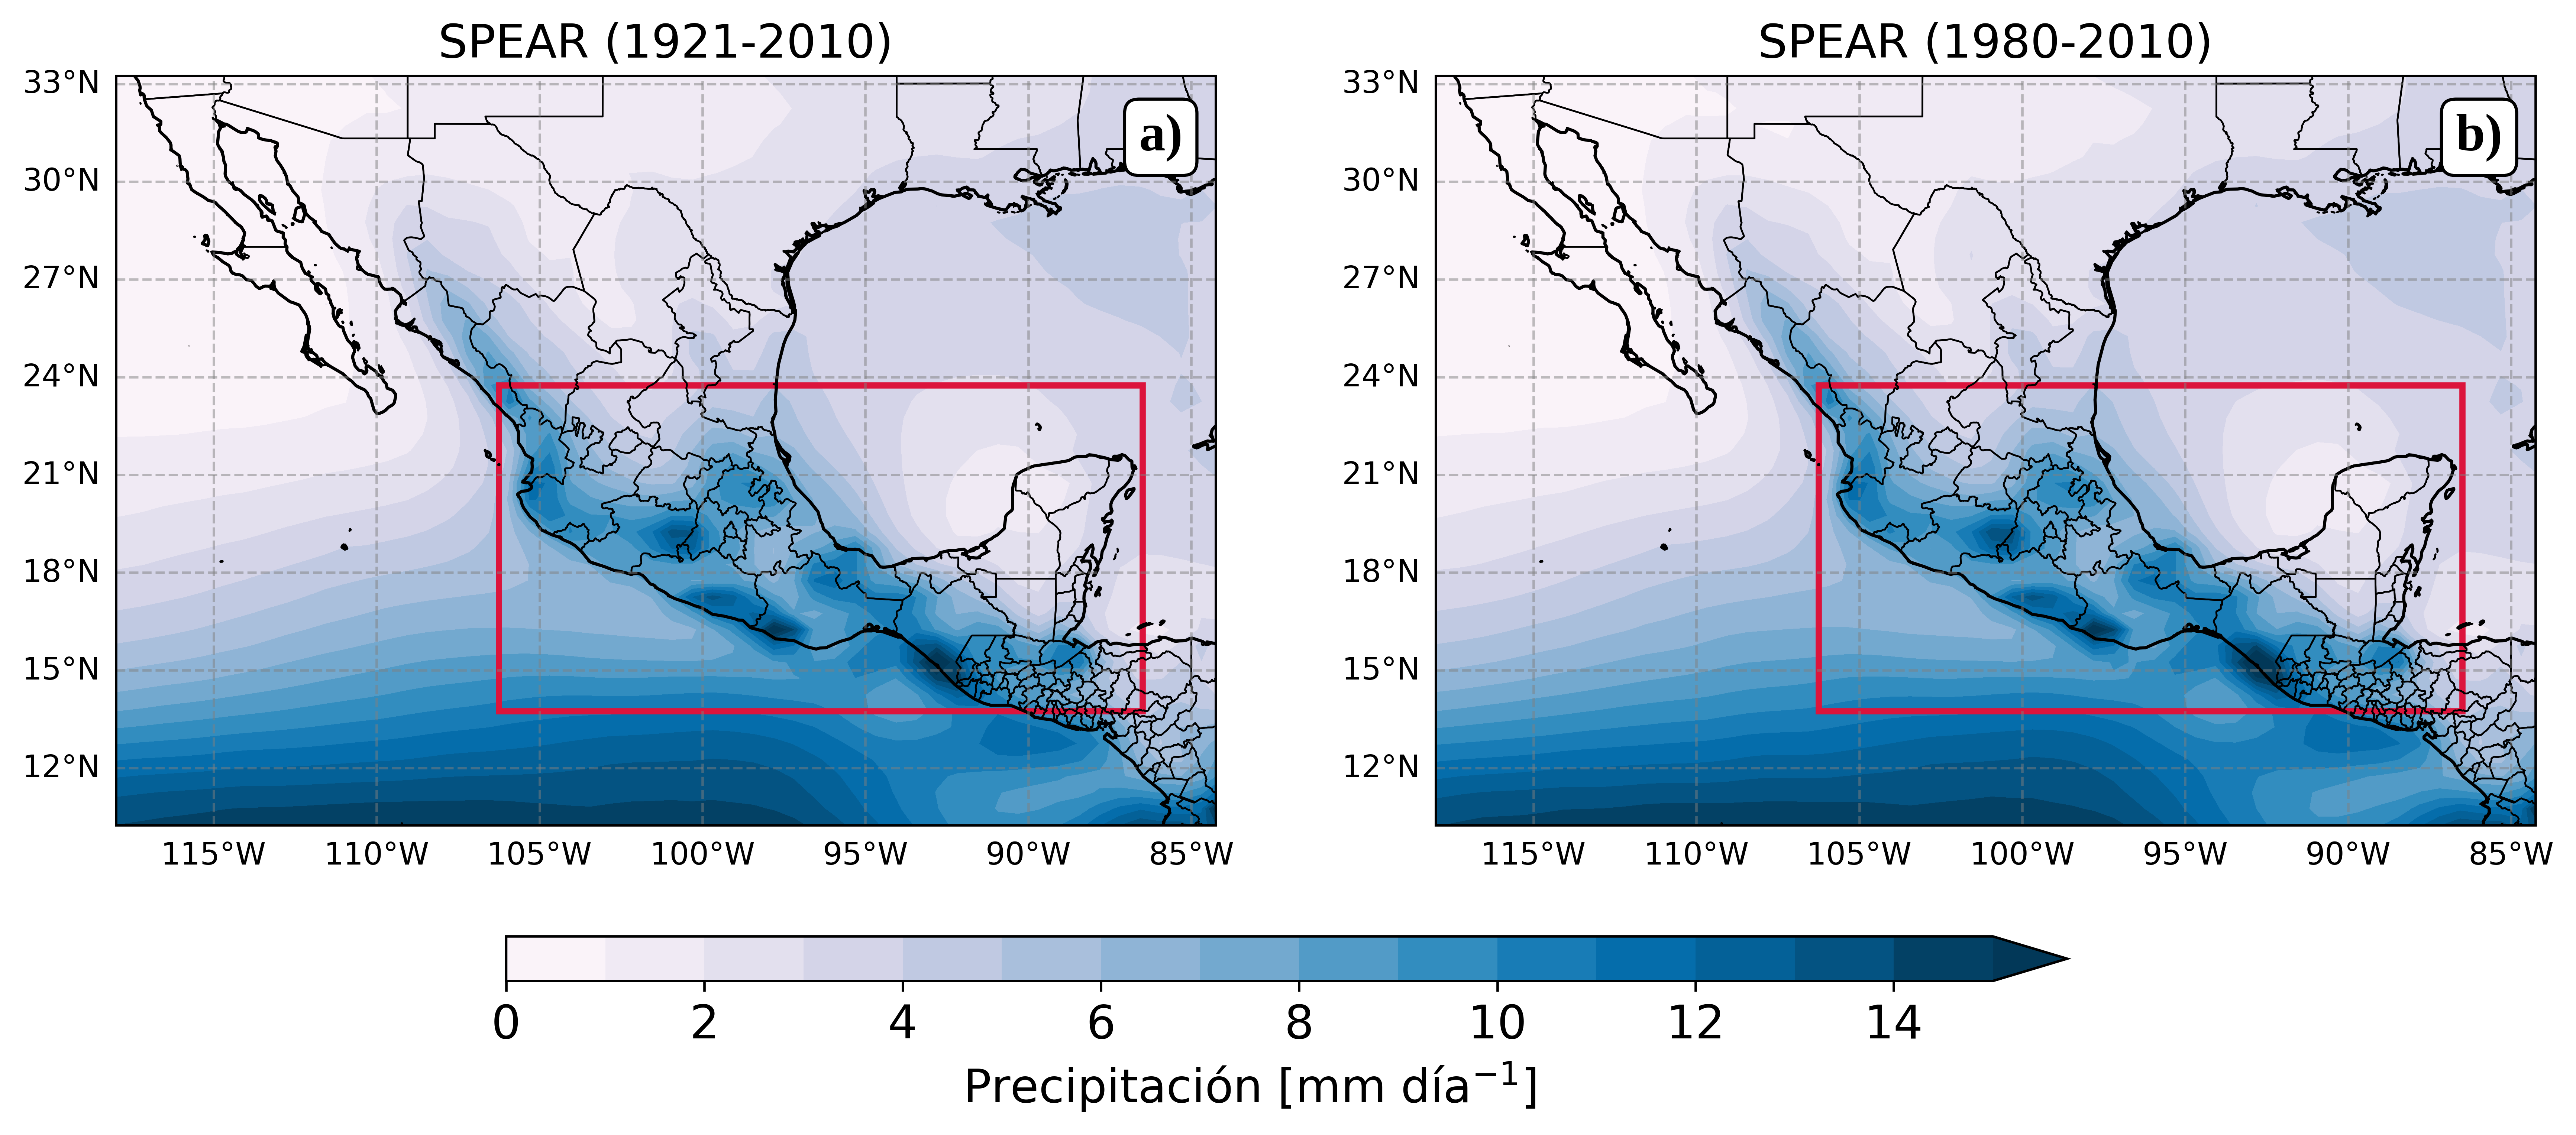

In [11]:
# Hacemos un diccionario con el nombre de la variable de precipitación de SPEAR
var_names = {'SPEAR_ens_completo_ClimJJAS.nc': 'precip', 'SPEAR_ens80_ClimJJAS.nc': 'precip'}

# Archivos netcdf de SPEAR (obtenidos en SPEAR CLimatologías)
files_precip = ['SPEAR_ens_completo_ClimJJAS.nc', 'SPEAR_ens80_ClimJJAS.nc']

# Titulos 
titulos = ['SPEAR (1921-2010)', 'SPEAR (1980-2010)']

panel_labels = ['a)', 'b)']

levels_globo = np.arange(0, 16, 1)  

# Creando la figura para los subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 10), dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.ravel()

# Coordenadas del recuadro del centro-sur
lat_min, lat_max = 13.75, 23.75
lon_min, lon_max = 253.75, 273.5

# Ciclo para recorrer y graficar
for i, (file_precip, titulo) in enumerate(zip(files_precip, titulos)):
    
    # Cargamos los datos de precipitación
    ds_precip = xr.open_dataset(file_precip)
    var_name = var_names[file_precip]
    precip_climatologia = ds_precip[var_name]

    # Ahora se crea el gráfico en el subplot correspondiente
    ax = axs[i]
    ax.coastlines()

    # Graficar en subplot usando levels_globo
    cs = ax.contourf(precip_climatologia.lon, precip_climatologia.lat, precip_climatologia, 
                     levels=levels_globo, cmap='PuBu', extend='max', transform=ccrs.PlateCarree())
    ax.set_extent([242, 275.75, 10.25, 33.25], crs=ccrs.PlateCarree())
    
    # Líneas de estados
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.55)
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False

    # Titulos 
    ax.set_title(titulo, fontsize=15)

    ax.text(0.97, 0.95, panel_labels[i], transform=ax.transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))

# Agregamos el recuadro rojo en cada mapa
    rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                     linewidth=2, edgecolor='crimson', facecolor='none', transform=ccrs.PlateCarree())
    ax.add_patch(rect)

# Colorbar única para los dos mapas
fig.subplots_adjust(bottom=0.15)
add_map_colorbar('horizontal', [0.25, 0.277, 0.5, 0.02], 'Precipitación [mm día$^{-1}$]', fig, cs)
plt.show()

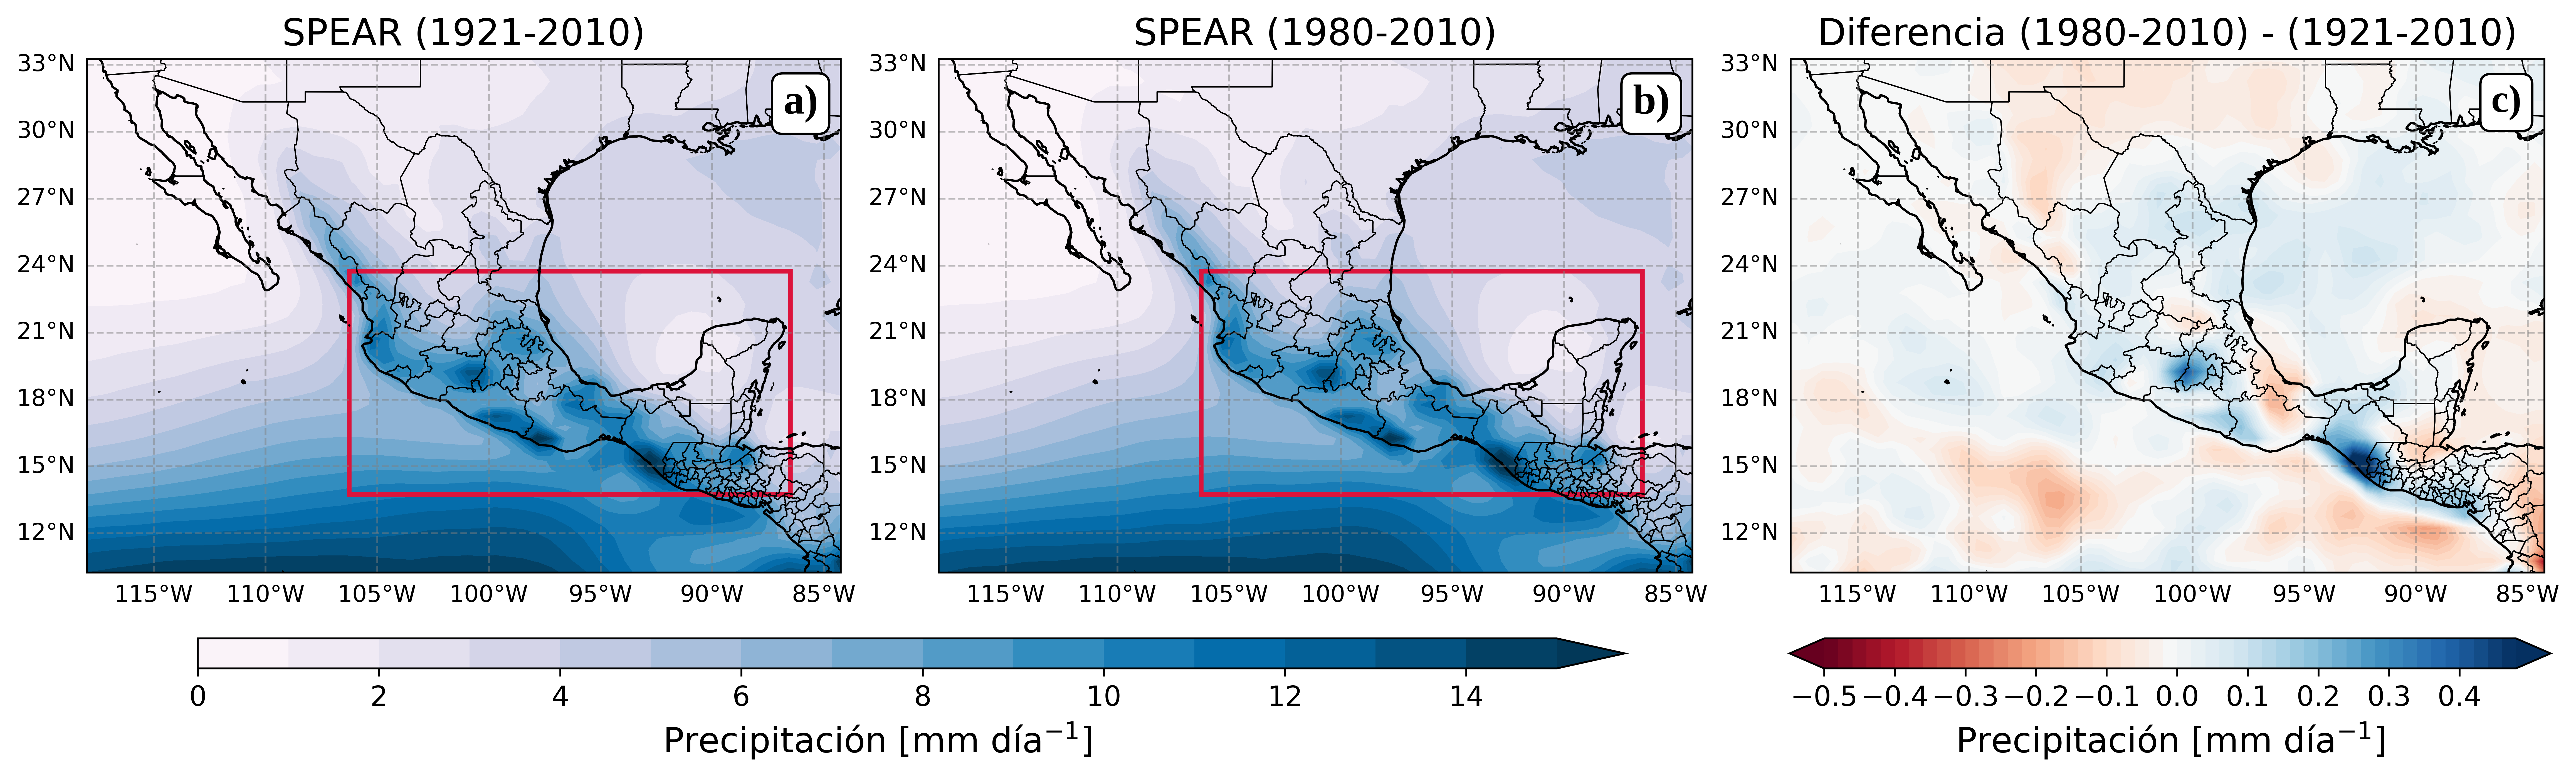

In [12]:
# Diccionario con el nombre de la variable de precipitación
var_names = {'SPEAR_ens_completo_ClimJJAS.nc': 'precip', 'SPEAR_ens80_ClimJJAS.nc': 'precip'}

# Archivos netcdf
files_precip = ['SPEAR_ens_completo_ClimJJAS.nc', 'SPEAR_ens80_ClimJJAS.nc']

# Titulos 
titulos = ['SPEAR (1921-2010)', 'SPEAR (1980-2010)', 'Diferencia (1980-2010) - (1921-2010)']

panel_labels = ['a)', 'b)', 'c)']

# Niveles para cada mapa
levels_globo = np.arange(0, 16, 1)  # Para los mapas de SPEAR
levels_dif = np.arange(-0.5, 0.5, 0.02)  # Para la diferencia (resta)

# Creamos una figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(19, 9), dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.ravel()

# Coordenadas del recuadro de la zona de estudio 
lat_min, lat_max = 13.75, 23.75
lon_min, lon_max = 253.75, 273.5

# Cargamos datos de precipitación
ds1 = xr.open_dataset(files_precip[0])
ds2 = xr.open_dataset(files_precip[1])

precip1 = ds1[var_names[files_precip[0]]]
precip2 = ds2[var_names[files_precip[1]]]

# Calculamos diferencia (reciente-completo)
diff_precip = precip2 - precip1

# Graficamos los mapas de SPEAR
for i, (precip_climatologia, titulo) in enumerate(zip([precip1, precip2], titulos[:2])):
    ax = axs[i]
    ax.coastlines()
    
    cs = ax.contourf(precip_climatologia.lon, precip_climatologia.lat, precip_climatologia, 
                     levels=levels_globo, cmap='PuBu', extend='max', transform=ccrs.PlateCarree())
    
    ax.set_extent([242, 275.75, 10.25, 33.25], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.55)
    
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False
    
    ax.set_title(titulo, fontsize=16)
    ax.text(0.97, 0.95, panel_labels[i], transform=ax.transAxes, fontsize=18, 
            fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))

    # Agregamos el recuadro rojo
    rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                     linewidth=2, edgecolor='crimson', facecolor='none', transform=ccrs.PlateCarree())
    ax.add_patch(rect)

# Graficamos el mapa de la diferencia
ax = axs[2]
ax.coastlines()

cs_diff = ax.contourf(diff_precip.lon, diff_precip.lat, diff_precip, 
                      levels=levels_dif, cmap='RdBu', extend='both', transform=ccrs.PlateCarree())

ax.set_extent([242, 275.75, 10.25, 33.25], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.55)

gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False

ax.set_title(titulos[2], fontsize=16)
ax.text(0.97, 0.95, panel_labels[2], transform=ax.transAxes, fontsize=17, fontname='Liberation Serif', 
        fontweight='bold', va='top', ha='right', bbox=dict(facecolor='white', edgecolor='black', 
        boxstyle='round,pad=0.27', linewidth=1))

# Ajuste de espacio para las colorbars 
fig.subplots_adjust(bottom=0.15)

# Colorbar para climatologías SPEAR (y extend='max')
cbar_ax1 = fig.add_axes([0.16, 0.285, 0.45, 0.02])  
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', extend='max')
cbar1.ax.tick_params(labelsize=12)
cbar1.set_label('Precipitación [mm día$^{-1}$]', fontsize=15)

# Colorbar para la diferencia (y extend='both')
cbar_ax2 = fig.add_axes([0.662, 0.285, 0.24, 0.02])  
cbar2 = fig.colorbar(cs_diff, cax=cbar_ax2, orientation='horizontal', extend='both')
cbar2.ax.tick_params(labelsize=12)
cbar2.set_label('Precipitación [mm día$^{-1}$]', fontsize=15)
# Ajustamos espacio
fig.subplots_adjust(hspace=0.15, wspace=0.13, bottom=0.12, top=0.92)
plt.show()

In [13]:
print(np.nanmin(diff_precip), np.nanmax(diff_precip))

-1.08881 0.5748806
